In [2]:
import os
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import seaborn
matplotlib.style.use('seaborn')
import torch as T
from agent_code.dqn_agent.dqn_model import DQN, Buffer

In [3]:
def latest(d):
    def steps(name):
        return int(name.split('step-')[-1].split('_aint')[0])
    def date(name):
        return datetime.datetime.fromisoformat(name.split('_')[0][6:])
    for f in os.listdir(d):
        if os.path.isfile(d+f):
            print(f)
            print(date(f))
            print(steps(f))
    flist = np.array([[f, date(f), steps(f)] for f in os.listdir(d) if os.path.isfile(d+f)])
    print(flist)
    print(flist[np.where(flist[:,1] == np.max(flist[:,1]))][:,2])
    return flist[np.argmax(flist[np.where(flist[:,1] == np.max(flist[:,1]))][:,2])][0]

In [9]:
last = True
directory = '/home/phaetjay/programming/ifml/models/'

name = 'from_vserver/model-2019-03-21 01:15:03_step-850000_aint-500_lint-8.pth'
#name = latest(directory) if last else name

In [10]:
print('Model name:', name)
aint = int(name.split('_aint-')[1].split('_lint')[0])
lint = int(name.split('_lint-')[1].split('.pth')[0])
data = T.load(directory+ name, map_location='cpu')['analysis']
print(f'Analysis interval: {aint}, learning interval: {lint}')
data = np.array(data)
print(f'Lenght of analysis data: {len(data)}')
steps = np.array([step['learningstep'] for step in data]) * lint
maxstep = np.max(steps)
print(f'This corresponds to {maxstep} training steps.')
print('\nExcerpt of the data:\n',data[0])

Model name: from_vserver/model-2019-03-21 01:15:03_step-850000_aint-500_lint-8.pth
Analysis interval: 500, learning interval: 8
Lenght of analysis data: 1700
This corresponds to 849608 training steps.

Excerpt of the data:
 {'explored': 0.096, 'q': <built-in method mean of numpy.ndarray object at 0x7ff99b3c1760>, 'reward': 0.127, 'action': 1.502, 'epsilon': 0.1, 'loss': 81.51170137539506, 'learningstep': 13}


In [30]:
action = [step['action'] for step in data]
reward = [step['reward'] for step in data]
epsilon = [step['epsilon'] for step in data]
explored = [step['explored'] for step in data]
loss = [step['loss'] for step in data]
q = [step['q'] for step in data]

print(q)

[<built-in method mean of numpy.ndarray object at 0x7ff99b3c1760>, <built-in method mean of numpy.ndarray object at 0x7ff99b34b940>, <built-in method mean of numpy.ndarray object at 0x7ff99b34b9e0>, <built-in method mean of numpy.ndarray object at 0x7ff99b34ba80>, <built-in method mean of numpy.ndarray object at 0x7ff99b34bb20>, <built-in method mean of numpy.ndarray object at 0x7ff99b34bbc0>, <built-in method mean of numpy.ndarray object at 0x7ff99b34bc60>, <built-in method mean of numpy.ndarray object at 0x7ff99b34bd00>, <built-in method mean of numpy.ndarray object at 0x7ff99b34bda0>, <built-in method mean of numpy.ndarray object at 0x7ff99b34be40>, <built-in method mean of numpy.ndarray object at 0x7ff99b34bee0>, <built-in method mean of numpy.ndarray object at 0x7ff99b34bf80>, <built-in method mean of numpy.ndarray object at 0x7ff99b2d3080>, <built-in method mean of numpy.ndarray object at 0x7ff99b2d3120>, <built-in method mean of numpy.ndarray object at 0x7ff99b375f30>, <built-in

### Plot of action taken in each step

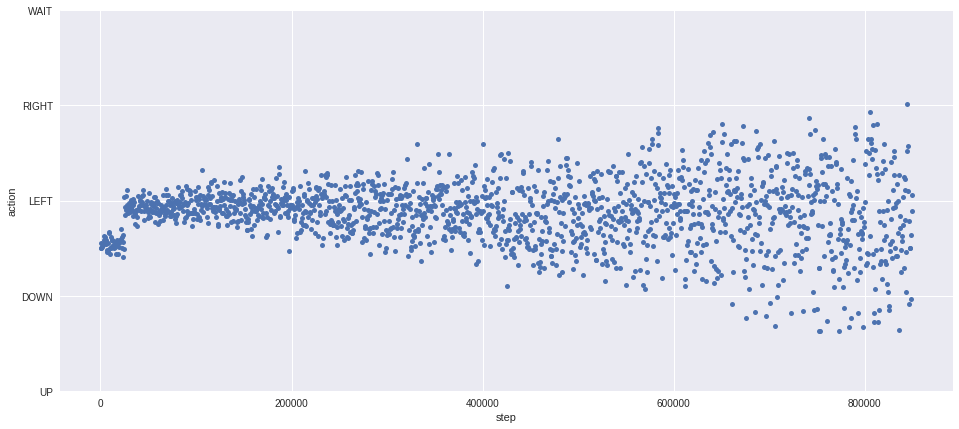

In [21]:
plt.figure(figsize=(16, 7))
plt.yticks((0, 1, 2, 3, 4), ('UP', 'DOWN', 'LEFT', 'RIGHT', 'WAIT'))
plt.ylim(0, 4)
plt.xlabel('step')
plt.ylabel('action')
plt.plot(steps, action, 'o', ms=5, color='C6')

### Plot of ε-greediness (exploration vs exploitation)

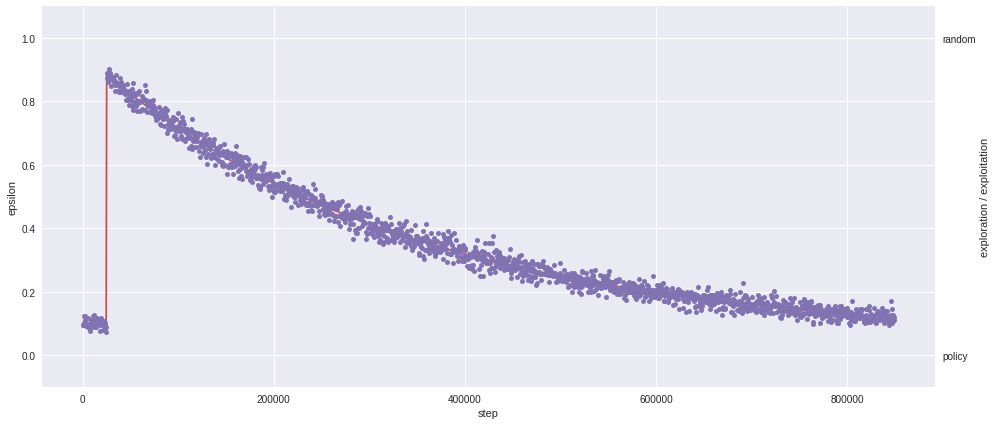

In [22]:
plt.figure(figsize=(16, 7))
plt.xlabel('step')
plt.ylim(-0.1, 1.1)
plt.ylabel('epsilon')
plt.twinx()
plt.ylabel('exploration / exploitation')
plt.yticks([0, 1], ('policy', 'random'))
plt.ylim(-0.1, 1.1)
plt.plot(steps, epsilon, '-', ms=3, color='C8')
plt.plot(steps, explored, 'o', ms='5', color='C9')

### Plot of reward in each step

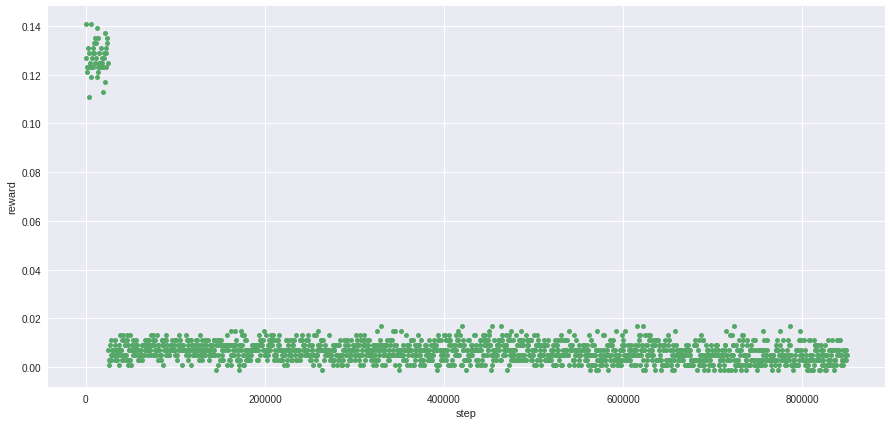

In [23]:
plt.figure(figsize=(15, 7))
plt.xlabel('step')
plt.ylabel('reward')
plt.plot(steps, reward, 'o', ms=5, color='C1')

### Plot of Q over training period

TypeError: float() argument must be a string or a number, not 'builtin_function_or_method'

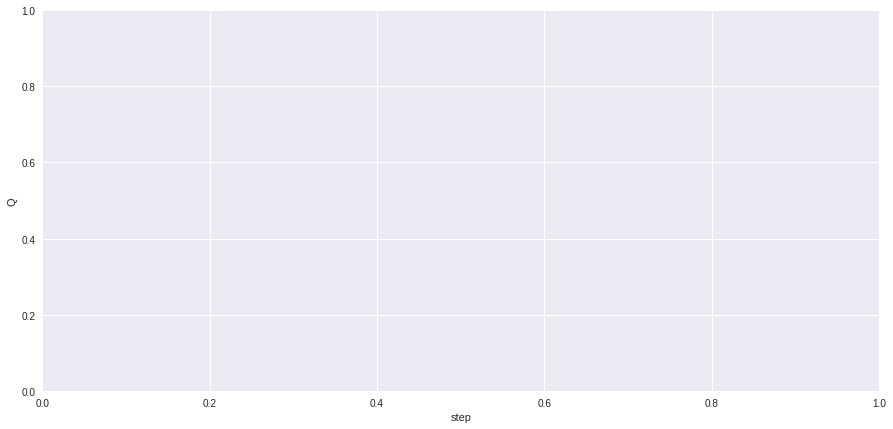

In [27]:
plt.figure(figsize=(15, 7))
plt.xlabel('step')
plt.ylabel('Q')
plt.plot(steps, q, 'o', ms=5, color='C1')

### Plot of loss over training period

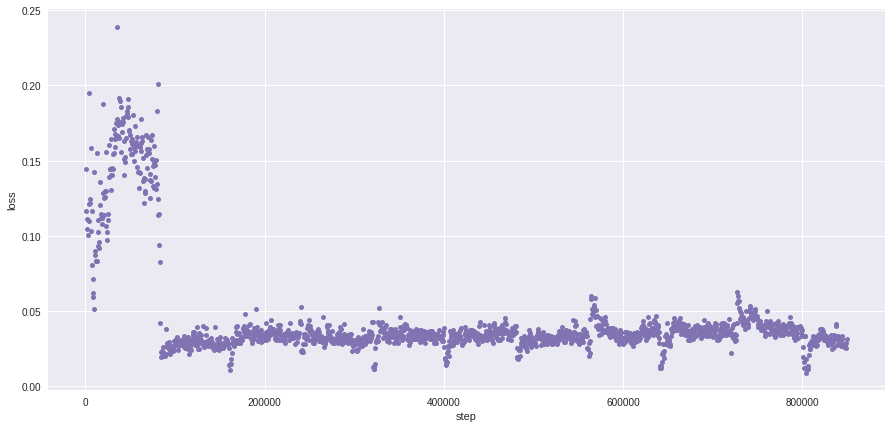

In [25]:
plt.figure(figsize=(15, 7))
plt.xlabel('step')
plt.ylabel('loss')
plt.plot(steps[1:], loss[1:], 'o', ms=5, color='C3')